In [1]:
# 1. 데이터 확인

import pandas as pd
import numpy as np

data = pd.read_csv("data/train.csv")
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 2. 필요한 컬럼 추출

filtered_data = data[["Survived","Pclass", "Sex", "Age"]].dropna(axis=0)

f_list_temp = filtered_data[["Pclass", "Sex", "Age"]].to_numpy().tolist()
f_target = [target[0] for target in filtered_data[["Survived"]].to_numpy().tolist()]

f_list= [[a, b, int(c//10)] for a, b, c in f_list_temp]
f_list

[[3, 'male', 2],
 [1, 'female', 3],
 [3, 'female', 2],
 [1, 'female', 3],
 [3, 'male', 3],
 [1, 'male', 5],
 [3, 'male', 0],
 [3, 'female', 2],
 [2, 'female', 1],
 [3, 'female', 0],
 [1, 'female', 5],
 [3, 'male', 2],
 [3, 'male', 3],
 [3, 'female', 1],
 [2, 'female', 5],
 [3, 'male', 0],
 [3, 'female', 3],
 [2, 'male', 3],
 [2, 'male', 3],
 [3, 'female', 1],
 [1, 'male', 2],
 [3, 'female', 0],
 [3, 'female', 3],
 [1, 'male', 1],
 [1, 'male', 4],
 [2, 'male', 6],
 [1, 'male', 2],
 [1, 'male', 4],
 [3, 'male', 2],
 [3, 'female', 1],
 [3, 'female', 1],
 [3, 'female', 4],
 [2, 'female', 2],
 [2, 'female', 0],
 [3, 'female', 1],
 [3, 'female', 1],
 [3, 'male', 0],
 [3, 'male', 2],
 [1, 'female', 4],
 [2, 'female', 2],
 [1, 'male', 6],
 [2, 'female', 2],
 [3, 'male', 2],
 [2, 'female', 0],
 [3, 'male', 1],
 [3, 'male', 2],
 [1, 'female', 3],
 [1, 'male', 4],
 [3, 'male', 0],
 [2, 'female', 2],
 [3, 'male', 1],
 [3, 'female', 1],
 [3, 'male', 2],
 [2, 'male', 3],
 [3, 'female', 1],
 [2, 'mal

In [4]:
# 3. sex age 합치기

def reduce_sex_age(sex_age_data) :
    if sex_age_data[0] == 'male' and sex_age_data[1] == 0 :
        return 0
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 1 :
        return 1
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 2 :
        return 2
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 3 :
        return 3
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 4 :
        return 4        
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 5 :
        return 5
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 6 :
        return 6
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 7 :
        return 7
    elif sex_age_data[0] == 'male' and sex_age_data[1] == 8 :
        return 8
    elif sex_age_data[0] == 'male' and sex_age_data[1] >= 9 :
        return 9
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 0 :
        return 10
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 1 :
        return 11
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 2 :
        return 12
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 3 :
        return 13
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 4 :
        return 14
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 5 :
        return 15
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 6 :
        return 16
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 7 :
        return 17
    elif sex_age_data[0] == 'female' and sex_age_data[1] == 8 :
        return 18
    else : 
        return 19

reduced_list =[[pclass, reduce_sex_age([age, sex])] for pclass, age, sex in f_list]
reduced_list

[[3, 2],
 [1, 13],
 [3, 12],
 [1, 13],
 [3, 3],
 [1, 5],
 [3, 0],
 [3, 12],
 [2, 11],
 [3, 10],
 [1, 15],
 [3, 2],
 [3, 3],
 [3, 11],
 [2, 15],
 [3, 0],
 [3, 13],
 [2, 3],
 [2, 3],
 [3, 11],
 [1, 2],
 [3, 10],
 [3, 13],
 [1, 1],
 [1, 4],
 [2, 6],
 [1, 2],
 [1, 4],
 [3, 2],
 [3, 11],
 [3, 11],
 [3, 14],
 [2, 12],
 [2, 10],
 [3, 11],
 [3, 11],
 [3, 0],
 [3, 2],
 [1, 14],
 [2, 12],
 [1, 6],
 [2, 12],
 [3, 2],
 [2, 10],
 [3, 1],
 [3, 2],
 [1, 13],
 [1, 4],
 [3, 0],
 [2, 12],
 [3, 1],
 [3, 11],
 [3, 2],
 [2, 3],
 [3, 11],
 [2, 2],
 [3, 2],
 [3, 3],
 [3, 2],
 [2, 0],
 [3, 13],
 [3, 2],
 [3, 2],
 [1, 2],
 [2, 11],
 [3, 13],
 [3, 1],
 [1, 12],
 [3, 2],
 [3, 2],
 [3, 2],
 [1, 4],
 [3, 2],
 [3, 5],
 [1, 7],
 [1, 2],
 [2, 13],
 [2, 3],
 [3, 12],
 [1, 2],
 [3, 3],
 [3, 3],
 [3, 2],
 [3, 12],
 [3, 3],
 [1, 4],
 [3, 11],
 [3, 2],
 [3, 12],
 [3, 11],
 [3, 2],
 [3, 7],
 [2, 2],
 [1, 2],
 [3, 10],
 [2, 2],
 [2, 3],
 [2, 13],
 [1, 5],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 14],
 [2, 12],
 [2,

In [5]:
# 4. 훈련 / 테스트 데이터 나누기

from sklearn.model_selection import train_test_split

filtered_data

train_input, test_input, train_target, test_target = train_test_split(
    np.array(reduced_list), np.array(f_target))

train_input

array([[ 1,  3],
       [ 1, 11],
       [ 1, 12],
       ...,
       [ 1,  6],
       [ 3, 14],
       [ 1, 16]])

In [6]:
# 5. 훈련

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [7]:
kn.score(train_input, train_target)

0.8130841121495327

In [8]:
# 6. 테스트

kn.score(test_input, test_target)

0.7877094972067039

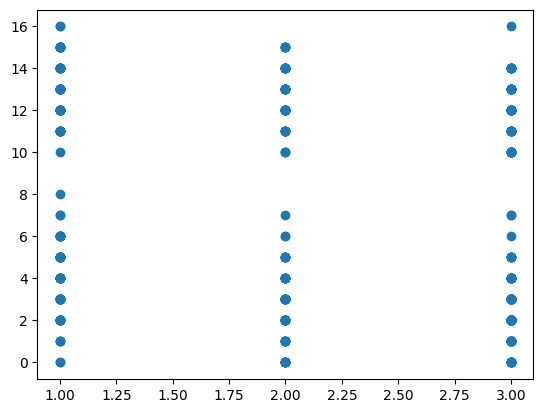

In [9]:
# 7. 결과

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.show()

In [10]:
print(kn.predict([[1,14]]))

[1]
